    Classes = 23
    Samples total = 4898431
    Dimensionality = 41
    Features = discrete (int) or continuous (float)
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import keras

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_curve, cohen_kappa_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate 
from sklearn import metrics
from sklearn.svm import SVC

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

%matplotlib inline


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/kdd_data/kddcup_data.csv')                                

In [ ]:
print(data)

        0  tcp  http  SF  181  5450  0.1  0.2  0.3  0.4  ...  9.1  1.2  0.22  \
0       0  tcp  http  SF  239   486    0    0    0    0  ...   19  1.0   0.0   
1       0  tcp  http  SF  235  1337    0    0    0    0  ...   29  1.0   0.0   
2       0  tcp  http  SF  219  1337    0    0    0    0  ...   39  1.0   0.0   
3       0  tcp  http  SF  217  2032    0    0    0    0  ...   49  1.0   0.0   
4       0  tcp  http  SF  217  2032    0    0    0    0  ...   59  1.0   0.0   
...    ..  ...   ...  ..  ...   ...  ...  ...  ...  ...  ...  ...  ...   ...   
494015  0  tcp  http  SF  310  1881    0    0    0    0  ...  255  1.0   0.0   
494016  0  tcp  http  SF  282  2286    0    0    0    0  ...  255  1.0   0.0   
494017  0  tcp  http  SF  203  1200    0    0    0    0  ...  255  1.0   0.0   
494018  0  tcp  http  SF  291  1200    0    0    0    0  ...  255  1.0   0.0   
494019  0  tcp  http  SF  219  1234    0    0    0    0  ...  255  1.0   0.0   

        0.11.1  0.23  0.24  0.25  0.26 

In [ ]:
print(f"The total number of rows: {data.shape[0]} | The total number of columns: {data.shape[1]}")

The total number of rows: 494020 | The total number of columns: 42


In [ ]:
data.columns = ['duration',
                'protocol_type',
                'service',
                'flag',
                'src_bytes',
                'dst_bytes',
                'land',
                'wrong_fragment',
                'urgent',
                'hot',
                'num_failed_logins',
                'logged_in',
                'num_compromised',
                'root_shell',
                'su_attempted',
                'num_root',
                'num_file_creations',
                'num_shells',
                'num_access_files',
                'num_outbound_cmds',
                'is_host_login',
                'is_guest_login',
                'count',
                'srv_count',
                'serror_rate',
                'srv_serror_rate',
                'rerror_rate',
                'srv_rerror_rate',
                'same_srv_rate',
                'diff_srv_rate',
                'srv_diff_host_rate',
                'dst_host_count',
                'dst_host_srv_count',
                'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate',
                'dst_host_srv_serror_rate',
                'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate',
                'labels'
                 ]

In [ ]:
# Checking to see any missing values in the dataset
print(data.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
print(data.duplicated())

print(f"The number of dublicated records in data frame: {data.duplicated().sum()}")

0         False
1         False
2         False
3         False
4         False
          ...  
494015    False
494016    False
494017    False
494018    False
494019    False
Length: 494020, dtype: bool
The number of dublicated records in data frame: 348435


In [ ]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

print(f"The total number of rows after removing duplicate records: {data.shape[0]} | The total number of columns after removing duplicate records: {data.shape[1]}")

The total number of rows after removing duplicate records: 145585 | The total number of columns after removing duplicate records: 42


In [ ]:
data.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
count,145585.000000,145585,145585,145585,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal.
freq,NaN,130912,62053,87458,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87831
mean,132.026088,NaN,NaN,NaN,7.995753e+03,2.859762e+03,0.000137,0.020201,0.000048,0.100175,...,129.935508,0.553219,0.061389,0.092825,0.019048,0.291599,0.290980,0.110464,0.107676,NaN
std,1224.161209,NaN,NaN,NaN,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,...,114.714785,0.456236,0.147021,0.241124,0.060410,0.452493,0.453448,0.306098,0.304221,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,...,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.880000e+02,1.164000e+03,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [ ]:
data.isin([0]).any().any()

# Removing the columns that has nothing but zeros. 

data['num_outbound_cmds'].value_counts()
data.drop('num_outbound_cmds', axis=1, inplace=True)

data['is_host_login'].value_counts()
data.drop('is_host_login', axis=1, inplace=True)

                

In [ ]:
# data = data.select_dtypes(include=['object']).copy()
# data.head()
# TO see the categorical values



In [ ]:
data['protocol_type'].value_counts()

num_protocol_type = {"protocol_type":{"tcp": 0, "udp": 1, "icmp":2}}

data = data.replace(num_protocol_type)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,0,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,0,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,0,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,0,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,0,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data['flag'].value_counts()

num_flag = {"flag":{"SF": 0, "S0": 1, "REJ":2,"RSTO":3,"RSTR":4,"S1":5,"SH":6,"S2":7,"RSTOS0":8,"S3":9,"OTH":10}}
data = data.replace(num_flag)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,0,http,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,0,http,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,0,http,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,0,http,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,0,http,0,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data['service'] = data['service'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

data['service'].value_counts()

22    62053
45    49057
50     9721
11     5425
40     4769
      ...  
1        11
58        5
41        1
57        1
46        1
Name: service, Length: 66, dtype: int64

In [ ]:
def categorise(row):  
    if row['labels'] == 'normal.':
        return 'normal'
    elif row['labels'] == 'back.' or row['labels'] == 'land.' or row['labels'] == 'neptune.' or row['labels'] == 'pod.' or row['labels']== 'smurf.' or row['labels'] == 'teardrop.':
        return 'dos'
    elif row['labels'] == 'buffer_overflow.' or row['labels'] == 'loadmodule.' or row['labels'] == 'perl.' or row['labels'] == 'rootkit.':
        return 'u2r'
    elif row['labels'] == 'ftp_write.' or row['labels'] == 'guess_passwd.' or row['labels'] == 'imap.' or row['labels'] == 'multihop.' or row['labels'] == 'phf.' or row['labels'] == 'spy.' or row['labels'] == 'warezclient.' or row['labels'] == 'warezmaster.':
        return 'r2l'
    elif row['labels'] == 'ipsweep.' or row['labels'] == 'nmap.' or row['labels'] == 'portsweep.' or row['labels'] == 'satan.':
        return 'probe'

data['label_types'] = data.apply(lambda row: categorise(row), axis=1)

In [ ]:
data['label_types'].value_counts()

normal    87831
dos       54572
probe      2131
r2l         999
u2r          52
Name: label_types, dtype: int64

In [1]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
data['label_types'].value_counts().apply(np.log).plot(kind='barh')

NameError: ignored

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,label_types
0,0,0,22,0,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,0,22,0,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,0,22,0,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,0,22,0,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,0,22,0,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,0,22,0,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494016,0,0,22,0,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,0,22,0,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494018,0,0,22,0,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [ ]:
data['src_bytes'] = (data['src_bytes'] - data['src_bytes'].mean()) / data['src_bytes'].std() 
data['dst_bytes'] = (data['dst_bytes'] - data['dst_bytes'].mean()) / data['dst_bytes'].std() 
data['srv_count'] = (data['srv_count'] - data['srv_count'].mean()) / data['srv_count'].std() 
data['dst_host_count'] = (data['dst_host_count'] - data['dst_host_count'].mean()) / data['dst_host_count'].std() 
data['dst_host_srv_count'] = (data['dst_host_srv_count'] - data['dst_host_srv_count'].mean()) / data['dst_host_srv_count'].std()
data['service'] = (data['service'] - data['service'].mean()) / data['service'].std()  



In [ ]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,label_types
0,0,0,-0.778626,0,-0.004261,-0.039036,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,0,-0.778626,0,-0.004263,-0.025041,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,0,-0.778626,0,-0.004272,-0.025041,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,0,-0.778626,0,-0.004273,-0.013612,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,0,-0.778626,0,-0.004273,-0.013612,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
data['dst_host_count'] = MinMaxScaler().fit_transform(np.array(data['dst_host_count']).reshape(-1,1))


In [ ]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,label_types
0,0,0,-0.778626,0,-0.004261,-0.039036,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,0,-0.778626,0,-0.004263,-0.025041,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,0,-0.778626,0,-0.004272,-0.025041,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,0,-0.778626,0,-0.004273,-0.013612,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,0,-0.778626,0,-0.004273,-0.013612,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
#data['label_types'].value_counts()
num_label_types = {"label_types":{"normal": 0, "dos": 1, "probe":2, "r2l": 3, "u2r":4}}
data = data.replace(num_label_types)

# num_label_types = {"label_types":{"normal": 0, "dos": 1, "probe":1, "r2l": 1, "u2r":1}}
# data = data.replace(num_label_types)

In [ ]:
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,label_types
0,0,0,-0.778626,0,-0.004261,-0.039036,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0
1,0,0,-0.778626,0,-0.004263,-0.025041,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0
2,0,0,-0.778626,0,-0.004272,-0.025041,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0


In [ ]:
data.drop('labels', axis=1, inplace=True)

In [ ]:
y = data[['label_types']]
data.drop('label_types', axis=1, inplace=True)

In [ ]:
pc_analysis= PCA(n_components= 20) #during experiments the number of components is changed

data = pc_analysis.fit_transform(data) #based on https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
data

array([[-1.31595862e+02, -6.72385958e+01, -1.96197313e-02, ...,
         3.71244664e-03,  3.95884992e-01, -2.46946875e-01],
       [-1.31595871e+02, -6.72390809e+01, -1.95929476e-02, ...,
         3.49323893e-03,  3.89430657e-01, -2.35030122e-01],
       [-1.31582998e+02, -6.92395025e+01, -1.98537114e-02, ...,
         4.71282808e-03,  3.71995994e-01, -2.28676758e-01],
       ...,
       [-1.31583200e+02, -6.92500893e+01, -2.03990100e-02, ...,
        -3.34913126e-02, -2.33712172e-02,  1.08956928e-01],
       [-1.31583187e+02, -6.92513780e+01, -2.03775921e-02, ...,
        -2.71639505e-02,  1.46731855e-02,  1.18231561e-01],
       [-1.31583203e+02, -6.92499984e+01, -2.05447750e-02, ...,
        -3.41784462e-02, -7.30234337e-02,  1.26996878e-01]])

In [ ]:
# my_array = np.array(data)
# data = pd.DataFrame(my_array)

In [ ]:
x = data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)
#data.to_csv('/content/drive/MyDrive/Colab Notebooks/data/processed_data/batu_data.csv')

In [ ]:
print(f"input train size = {x_train.shape}, input test size = {x_test.shape}, output train size = {y_train.shape}, output test size = {y_test.shape}")

input train size = (101909, 20), input test size = (43676, 20), output train size = (101909, 1), output test size = (43676, 1)


In [ ]:
# # Create model object
# clf = MLPClassifier(hidden_layer_sizes=(6,5),
#                     random_state=5,
#                     verbose=True,
#                     learning_rate_init=0.01)

# # Fit data onto the model
# clf.fit(x_train,y_train)
# ypred=clf.predict(x_test)
# accuracy_score(y_test,ypred)

In [ ]:
# model = Sequential()

# model.add(Dense(32,input_shape=(20,),activation = 'relu',kernel_initializer='glorot_uniform')) 

# model.add(Dense(16,activation = 'relu',kernel_initializer='glorot_uniform'))

# model.add(Dense(8,activation = 'relu',kernel_initializer='glorot_uniform'))

# model.add(Dense(4,activation = 'softmax',kernel_initializer='glorot_uniform'))

# model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform')) 

# opt = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(loss ='binary_crossentropy',optimizer = opt ,metrics = ['accuracy']) 

# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#                         patience=5, verbose=1, mode='auto',
#                            restore_best_weights=True)
# show_training_process = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[monitor])

# model.summary()


In [ ]:
# test_results = model.evaluate(x_test, y_test, verbose=1)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

In [ ]:
#Inspired from: https://scikit-learn.org/stable/modules/naive_bayes.html

SupportVectorClassModel = SVC()
SupportVectorClassModel.fit(x_train,y_train)
y_pred = SupportVectorClassModel.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Accuracy score:{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy score:94.83%


In [ ]:
target_names = ["normal", "dos", "probe", "r2l", "u2r"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.93      0.99      0.96     26373
         dos       0.98      0.92      0.95     16360
       probe       0.67      0.30      0.41       640
         r2l       0.00      0.00      0.00       289
         u2r       0.00      0.00      0.00        14

    accuracy                           0.95     43676
   macro avg       0.52      0.44      0.47     43676
weighted avg       0.94      0.95      0.94     43676



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is:
[[26097   272     4     0     0]
 [ 1140 15132    88     0     0]
 [  392    57   191     0     0]
 [  289     0     0     0     0]
 [   13     1     0     0     0]]


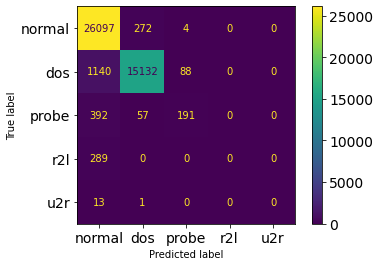

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=SupportVectorClassModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal", "dos", "probe", "r2l", "u2r"])
disp.plot()
plt.show()